# CAUSAL INFORMED PREDICTIVE MONITORING
---
## Dataset: BPI Challenge 2015_2

### imports

In [1]:
import pandas as pd
import missingno as msno
import causality
import elp
import os
import json

/home/ppibot/Escritorio/causally-informed-prescriptive-monitoring-main/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### load the data


In [2]:
log = pd.read_csv("../data/bpi2015_2.csv", sep=",", encoding="iso-8859-1")

/tmp/ipykernel_105962/1120717642.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  log = pd.read_csv("../data/bpi2015_2.csv", sep=",", encoding="iso-8859-1")


In [3]:
log.head()

,case,event,startTime,completeTime,termName,startDate,caseProcedure,Responsible_actor,caseStatus,Includes_subCases,...,activityNameEN,org:resource,action_code,activityNameNL,planned,dateStop,dateFinished,question,dueDate,monitoringResource
0,10358444,01_HOOFD_010,2012/03/21 00:00:00.000,2012/03/21 00:00:00.000,NaN,2012/03/21 00:00:00.000,Uitgebreid,4634935,G,J,...,register submission date request,560530,01_HOOFD_010,registratie datum binnenkomst aanvraag,2012/03/23 10:21:14.000,NaN,2013-01-10 12:07:35,EMPTY,NaN,4634935
1,10358444,01_HOOFD_011,2012/03/22 10:26:08.000,2012/03/22 10:26:08.000,NaN,2012/03/21 00:00:00.000,Uitgebreid,4634935,G,J,...,OLO messaging active,560530,01_HOOFD_011,OLO berichtenverkeer actief,2012/03/23 10:26:05.000,NaN,2013-01-10 12:07:35,False,NaN,4634935
2,10358444,01_HOOFD_020,2012/03/22 10:26:08.000,2012/03/22 10:26:08.000,NaN,2012/03/21 00:00:00.000,Uitgebreid,4634935,G,J,...,send confirmation receipt,560530,01_HOOFD_020,versturen ontvangstbevestiging,2012/03/23 10:26:05.000,NaN,2013-01-10 12:07:35,True,NaN,4634935
3,10358444,01_HOOFD_015,2012/03/22 10:26:08.000,2012/03/22 10:26:08.000,NaN,2012/03/21 00:00:00.000,Uitgebreid,4634935,G,J,...,phase application received,560530,01_HOOFD_015,fase aanvraag ontvangen,2012/03/23 10:26:05.000,NaN,2013-01-10 12:07:35,EMPTY,NaN,4634935
4,10358444,03_GBH_005,2012/03/22 10:26:09.000,2012/03/22 10:26:09.000,NaN,2012/03/21 00:00:00.000,Uitgebreid,4634935,G,J,...,applicant is stakeholder,560530,03_GBH_005,aanvrager is belanghebbende,2012/03/23 10:26:05.000,NaN,2013-01-10 12:07:35,True,NaN,4634935


In [4]:
log.describe()

,case,Responsible_actor,landRegisterID,SUMleges,case_type,IDofConceptCase,org:resource,monitoringResource
count,4.435400e+04,4.435400e+04,1.166800e+04,32548.000000,44354.0,1.708800e+04,4.435400e+04,4.435400e+04
mean,1.441835e+07,9.968438e+05,2.127078e+07,2214.500650,557669.0,1.868919e+07,1.167238e+06,9.963534e+05
std,8.171112e+06,1.259957e+06,3.314367e+06,4339.470856,0.0,6.399222e+06,3.292138e+06,1.347005e+06
min,3.461877e+06,5.604580e+05,7.254440e+05,-8384.015000,557669.0,3.462766e+06,5.604290e+05,5.604290e+05
25%,4.400074e+06,5.604580e+05,2.092768e+07,143.310000,557669.0,2.014652e+07,5.605190e+05,5.604580e+05
50%,1.998659e+07,5.605190e+05,2.159082e+07,418.128000,557669.0,2.084980e+07,5.605300e+05,5.605190e+05
75%,2.103839e+07,5.605210e+05,2.252964e+07,2519.137000,557669.0,2.217678e+07,5.605320e+05,5.605210e+05
max,2.415414e+07,4.634935e+06,2.417142e+07,52939.727000,557669.0,2.415422e+07,2.244590e+07,2.244590e+07


<Axes: >

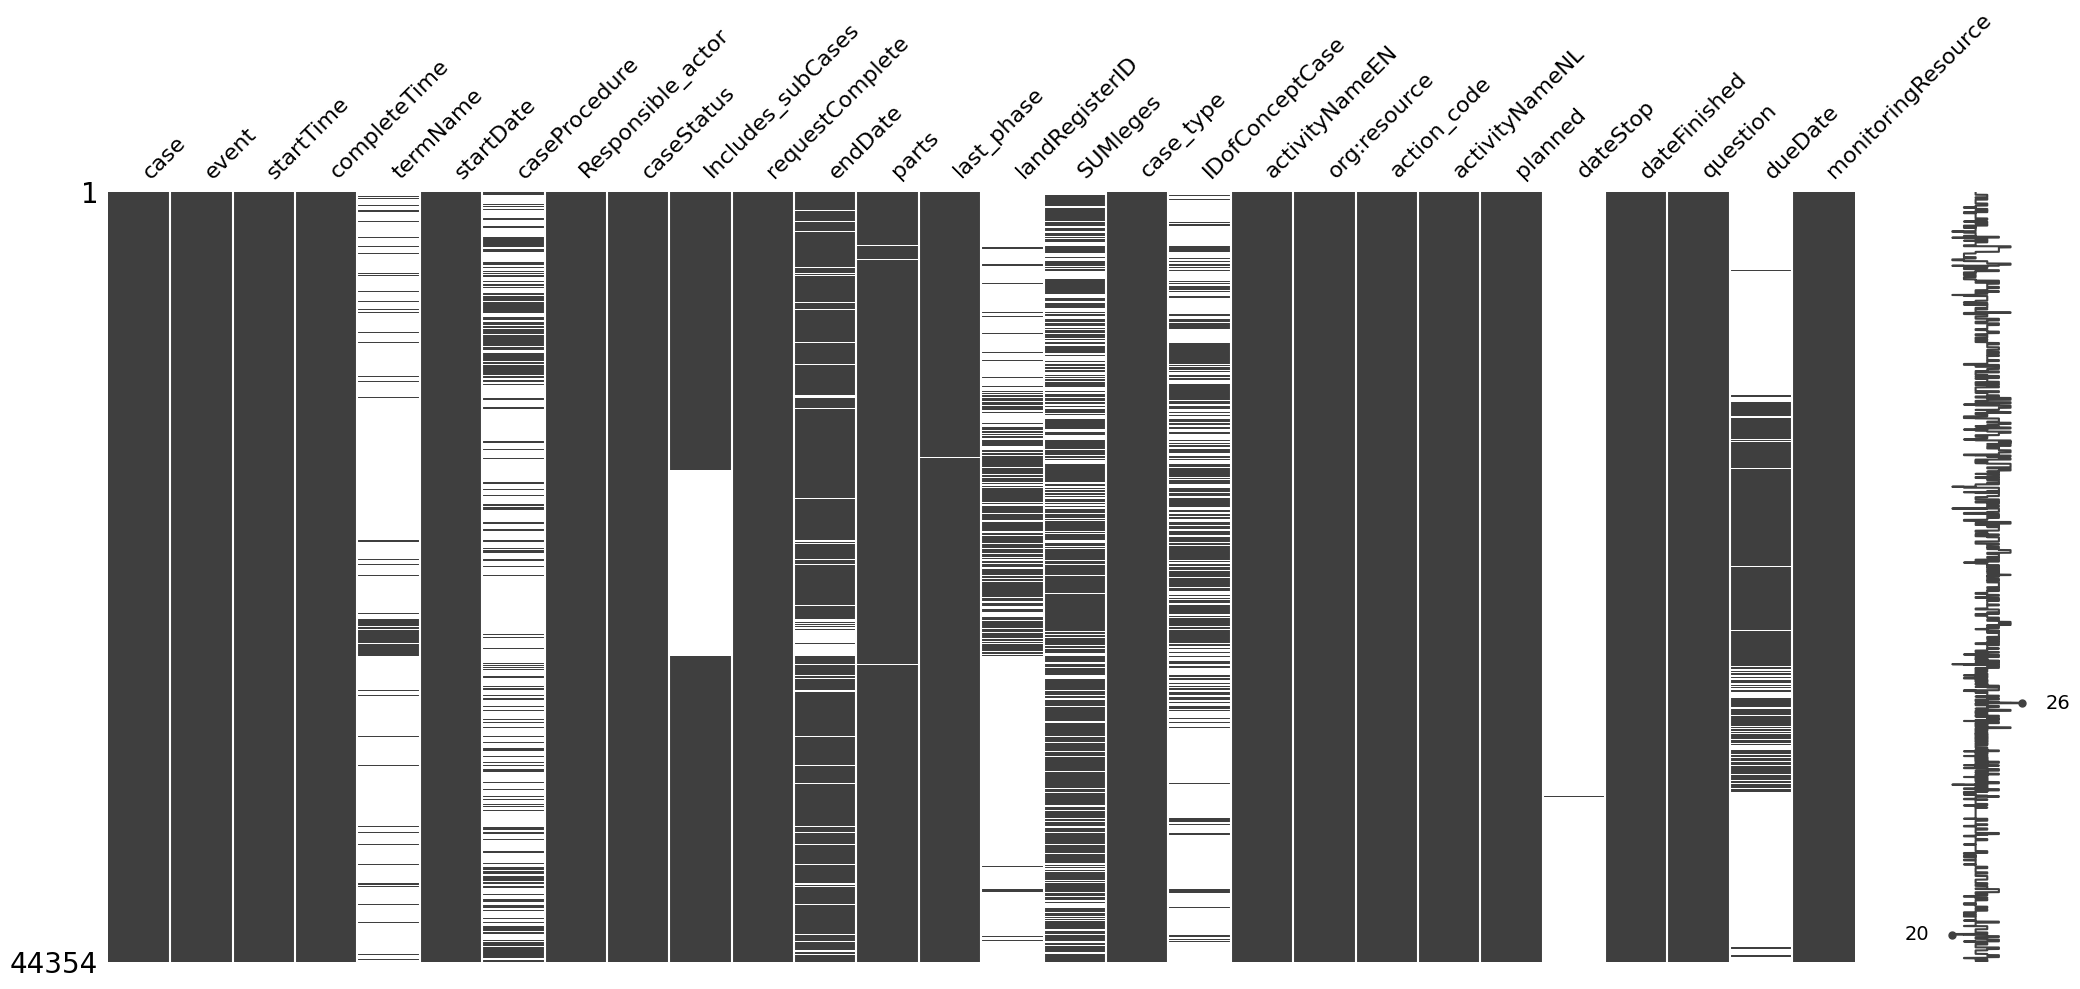

In [5]:
msno.matrix(log)

In [6]:
log.fillna("UNKNOWN", inplace=True)

/tmp/ipykernel_105962/2811332286.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'UNKNOWN' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  log.fillna("UNKNOWN", inplace=True)


<Axes: >

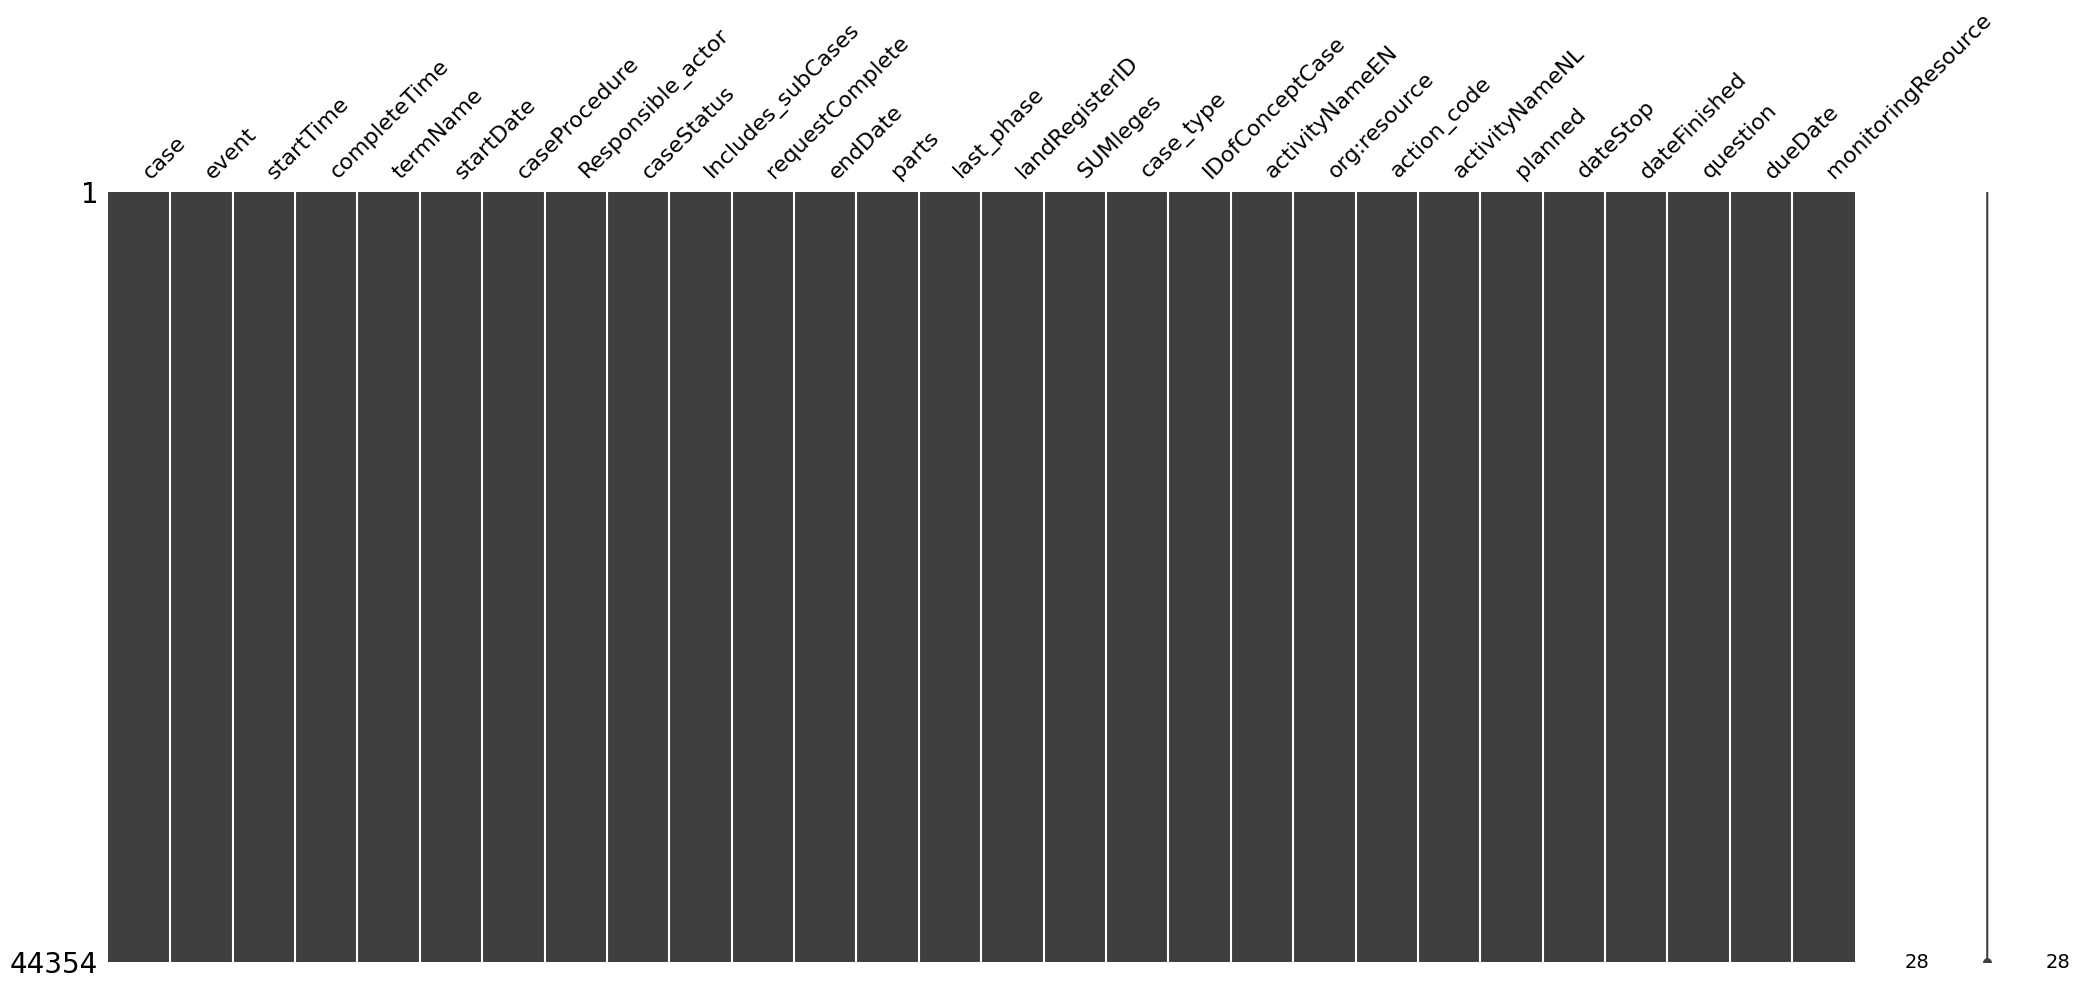

In [7]:
msno.matrix(log)

In [8]:
log.rename(columns={"case": "id", "completeTime": "timestamp"}, inplace=True)

In [9]:
log

,id,event,startTime,timestamp,termName,startDate,caseProcedure,Responsible_actor,caseStatus,Includes_subCases,...,activityNameEN,org:resource,action_code,activityNameNL,planned,dateStop,dateFinished,question,dueDate,monitoringResource
0,10358444,01_HOOFD_010,2012/03/21 00:00:00.000,2012/03/21 00:00:00.000,UNKNOWN,2012/03/21 00:00:00.000,Uitgebreid,4634935,G,J,...,register submission date request,560530,01_HOOFD_010,registratie datum binnenkomst aanvraag,2012/03/23 10:21:14.000,UNKNOWN,2013-01-10 12:07:35,EMPTY,UNKNOWN,4634935
1,10358444,01_HOOFD_011,2012/03/22 10:26:08.000,2012/03/22 10:26:08.000,UNKNOWN,2012/03/21 00:00:00.000,Uitgebreid,4634935,G,J,...,OLO messaging active,560530,01_HOOFD_011,OLO berichtenverkeer actief,2012/03/23 10:26:05.000,UNKNOWN,2013-01-10 12:07:35,False,UNKNOWN,4634935
2,10358444,01_HOOFD_020,2012/03/22 10:26:08.000,2012/03/22 10:26:08.000,UNKNOWN,2012/03/21 00:00:00.000,Uitgebreid,4634935,G,J,...,send confirmation receipt,560530,01_HOOFD_020,versturen ontvangstbevestiging,2012/03/23 10:26:05.000,UNKNOWN,2013-01-10 12:07:35,True,UNKNOWN,4634935
3,10358444,01_HOOFD_015,2012/03/22 10:26:08.000,2012/03/22 10:26:08.000,UNKNOWN,2012/03/21 00:00:00.000,Uitgebreid,4634935,G,J,...,phase application received,560530,01_HOOFD_015,fase aanvraag ontvangen,2012/03/23 10:26:05.000,UNKNOWN,2013-01-10 12:07:35,EMPTY,UNKNOWN,4634935
4,10358444,03_GBH_005,2012/03/22 10:26:09.000,2012/03/22 10:26:09.000,UNKNOWN,2012/03/21 00:00:00.000,Uitgebreid,4634935,G,J,...,applicant is stakeholder,560530,03_GBH_005,aanvrager is belanghebbende,2012/03/23 10:26:05.000,UNKNOWN,2013-01-10 12:07:35,True,UNKNOWN,4634935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44349,9968404,01_HOOFD_815,2012/10/08 12:42:38.000,2012/10/08 12:42:38.000,UNKNOWN,2012/03/07 00:00:00.000,Uitgebreid,560521,G,J,...,phase case handled,560532,01_HOOFD_815,fase zaak afgehandeld,2012/10/09 12:17:31.000,UNKNOWN,2012-10-08 12:42:49,EMPTY,UNKNOWN,560521
44350,9968404,01_HOOFD_814,2012/10/08 12:42:38.000,2012/10/08 12:42:38.000,UNKNOWN,2012/03/07 00:00:00.000,Uitgebreid,560521,G,J,...,phase archived case,560532,01_HOOFD_814,fase zaak gearchiveerd,2012/10/09 12:17:31.000,UNKNOWN,2012-10-08 12:42:49,EMPTY,UNKNOWN,560521
44351,9968404,01_HOOFD_820,2012/10/08 12:42:41.000,2012/10/08 12:42:41.000,UNKNOWN,2012/03/07 00:00:00.000,Uitgebreid,560521,G,J,...,close case,560532,01_HOOFD_820,zaak afsluiten,2012/10/09 12:17:31.000,UNKNOWN,2012-10-08 12:42:49,EMPTY,UNKNOWN,560521
44352,9968404,01_HOOFD_516,2012/10/15 00:00:00.000,2012/10/15 00:00:00.000,UNKNOWN,2012/03/07 00:00:00.000,Uitgebreid,560521,G,J,...,date decision for inspection,560532,01_HOOFD_516,datum beschikking ter inzage,2012/10/09 12:17:31.000,UNKNOWN,2012-10-08 12:42:49,EMPTY,UNKNOWN,560521


In [10]:
log["id"].describe()

count    4.435400e+04
mean     1.441835e+07
std      8.171112e+06
min      3.461877e+06
25%      4.400074e+06
50%      1.998659e+07
75%      2.103839e+07
max      2.415414e+07
Name: id, dtype: float64

In [11]:
log["timestamp"]

0        2012/03/21 00:00:00.000
1        2012/03/22 10:26:08.000
2        2012/03/22 10:26:08.000
3        2012/03/22 10:26:08.000
4        2012/03/22 10:26:09.000
                  ...           
44349    2012/10/08 12:42:38.000
44350    2012/10/08 12:42:38.000
44351    2012/10/08 12:42:41.000
44352    2012/10/15 00:00:00.000
44353    2012/11/26 00:00:00.000
Name: timestamp, Length: 44354, dtype: object

### preprocessing and encode

In [12]:
log = elp.EventLog(log, "id", "timestamp")

/home/ppibot/Escritorio/causally-informed-prescriptive-monitoring-main/.venv/lib/python3.10/site-packages/elp/event_log.py:43: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temp = pd.to_datetime(


In [13]:
log.df.columns

Index(['id', 'event', 'startTime', 'timestamp', 'termName', 'startDate',
       'caseProcedure', 'Responsible_actor', 'caseStatus', 'Includes_subCases',
       'requestComplete', 'endDate', 'parts', 'last_phase', 'landRegisterID',
       'SUMleges', 'case_type', 'IDofConceptCase', 'activityNameEN',
       'org:resource', 'action_code', 'activityNameNL', 'planned', 'dateStop',
       'dateFinished', 'question', 'dueDate', 'monitoringResource'],
      dtype='object')

In [14]:
log.df.head()

,id,event,startTime,timestamp,termName,startDate,caseProcedure,Responsible_actor,caseStatus,Includes_subCases,...,activityNameEN,org:resource,action_code,activityNameNL,planned,dateStop,dateFinished,question,dueDate,monitoringResource
0,3461877,01_HOOFD_010,2010/10/08 00:00:00.000,2010-10-08 00:00:00+00:00,UNKNOWN,2010/10/08 00:00:00.000,UNKNOWN,560458,G,J,...,register submission date request,560458,01_HOOFD_010,registratie datum binnenkomst aanvraag,2010/10/13 11:57:32.000,UNKNOWN,2010-10-12 12:01:27,EMPTY,UNKNOWN,560458
1,3461877,01_HOOFD_030_2,2010/10/12 00:00:00.000,2010-10-12 00:00:00+00:00,UNKNOWN,2010/10/08 00:00:00.000,UNKNOWN,560458,G,J,...,enter senddate acknowledgement,560458,01_HOOFD_030_2,invoeren verzenddatum ontvangstbevestiging,2010/10/13 11:57:58.000,UNKNOWN,2010-10-12 12:01:27,EMPTY,UNKNOWN,560458
2,3461877,01_HOOFD_015,2010/10/12 11:57:34.000,2010-10-12 11:57:34+00:00,UNKNOWN,2010/10/08 00:00:00.000,UNKNOWN,560458,G,J,...,phase application received,560458,01_HOOFD_015,fase aanvraag ontvangen,2010/10/13 11:57:58.000,UNKNOWN,2010-10-12 12:01:27,EMPTY,UNKNOWN,560458
3,3461877,01_HOOFD_020,2010/10/12 11:57:39.000,2010-10-12 11:57:39+00:00,UNKNOWN,2010/10/08 00:00:00.000,UNKNOWN,560458,G,J,...,reception through OLO,560458,01_HOOFD_020,ontvangst via OLO,2010/10/13 11:57:34.000,UNKNOWN,2010-10-12 12:01:27,False,UNKNOWN,560458
4,3461877,01_HOOFD_030_1,2010/10/12 11:57:58.000,2010-10-12 11:57:58+00:00,UNKNOWN,2010/10/08 00:00:00.000,UNKNOWN,560458,G,J,...,send confirmation receipt,560458,01_HOOFD_030_1,versturen ontvangstbevestiging,2010/10/13 11:57:39.000,UNKNOWN,2010-10-12 12:01:27,EMPTY,2010/10/16 11:57:39.000,560458


In [15]:
colums_to_encode = list(log.df.select_dtypes(include="object").columns)
colums_to_encode.remove("landRegisterID")
colums_to_encode.remove("SUMleges")
colums_to_encode.remove("IDofConceptCase")
colums_to_encode.append("requestComplete")
print(colums_to_encode)

causality.label_encode(log.df, colums_to_encode)

log.df.head()

['event', 'startTime', 'termName', 'startDate', 'caseProcedure', 'caseStatus', 'Includes_subCases', 'endDate', 'parts', 'last_phase', 'activityNameEN', 'action_code', 'activityNameNL', 'planned', 'dateStop', 'dateFinished', 'question', 'dueDate', 'requestComplete']


,id,event,startTime,timestamp,termName,startDate,caseProcedure,Responsible_actor,caseStatus,Includes_subCases,...,activityNameEN,org:resource,action_code,activityNameNL,planned,dateStop,dateFinished,question,dueDate,monitoringResource
0,3461877,32,1,2010-10-08 00:00:00+00:00,9,0,1,560458,0,0,...,218,560458,32,240,0,1,0,379,398,560458
1,3461877,38,3,2010-10-12 00:00:00+00:00,9,0,1,560458,0,0,...,94,560458,38,201,3,1,0,379,398,560458
2,3461877,35,4,2010-10-12 11:57:34+00:00,9,0,1,560458,0,0,...,166,560458,35,124,3,1,0,379,398,560458
3,3461877,36,5,2010-10-12 11:57:39+00:00,9,0,1,560458,0,0,...,208,560458,36,220,1,1,0,381,398,560458
4,3461877,37,6,2010-10-12 11:57:58+00:00,9,0,1,560458,0,0,...,236,560458,37,285,2,1,0,379,0,560458


In [16]:
import elp.encoders as en

encoder = en.LogEncoder(
    transformers=[
        ("drop", "drop", ["id"]),
        (
            "keep",
            "keep",
            [
                "termName",
                "startDate",
                "caseProcedure",
                "caseStatus",
                "Includes_subCases",
                "endDate",
                "parts",
                "requestComplete",
                "last_phase",
                "case_type",
                "event",
                "activityNameEN",
                "action_code",
                "activityNameNL",
                "planned",
                "question",
                "monitoringResource",
            ],
        ),
        (
            "timestamp",
            en.TimestampFeatures(
                log.id_column,
                [
                    "event_order",
                    "time_from_start",
                    "time_from_midnight",
                    "total_time",
                    "elapsed_time_from_event",
                ],
                unit="1h",
            ),
            [log.timestamp_column],
        ),
    ]
)

encoder.check_unused(log)

['startTime',
 'Responsible_actor',
 'landRegisterID',
 'SUMleges',
 'IDofConceptCase',
 'org:resource',
 'dateStop',
 'dateFinished',
 'dueDate']

In [17]:
dataset = encoder.fit_transform(log)

Fitting drop
Fitting keep
Fitting timestamp
Transforming drop
Transforming keep
Transforming timestamp


In [18]:
dataset

,termName,startDate,caseProcedure,caseStatus,Includes_subCases,endDate,parts,requestComplete,last_phase,case_type,...,action_code,activityNameNL,planned,question,monitoringResource,event_order_timestamp,time_from_start_timestamp,time_from_midnight_timestamp,total_time_timestamp,elapsed_time_from_event_timestamp
0,9,0,1,0,0,429,60,1,21,557669,...,32,240,0,379,560458,0,0.000000,0.000000,5529.731389,0.000000
1,9,0,1,0,0,429,60,1,21,557669,...,38,201,3,379,560458,1,96.000000,0.000000,5529.731389,96.000000
2,9,0,1,0,0,429,60,1,21,557669,...,35,124,3,379,560458,2,107.959444,11.959444,5529.731389,11.959444
3,9,0,1,0,0,429,60,1,21,557669,...,36,220,1,381,560458,3,107.960833,11.960833,5529.731389,0.001389
4,9,0,1,0,0,429,60,1,21,557669,...,37,285,2,379,560458,4,107.966111,11.966111,5529.731389,0.005278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44349,4,581,1,1,2,671,6,1,0,557669,...,43,7,24754,379,560521,8,96.000000,0.000000,111.298889,0.000000
44350,4,581,1,1,2,671,6,1,0,557669,...,35,124,24749,379,560521,9,96.000000,0.000000,111.298889,0.000000
44351,4,581,1,1,2,671,6,1,0,557669,...,37,285,24750,379,560521,10,96.000000,0.000000,111.298889,0.000000
44352,4,581,1,1,2,671,6,1,0,557669,...,41,1,24753,379,560521,11,96.000000,0.000000,111.298889,0.000000


### run base experiment

Split 0: 7394 train rows, 7392 test rows
{'mse': 437527.7455286462,
 'rmse': 661.4588010818559,
 'split': 0,
 'time': 0.3830244541168213}


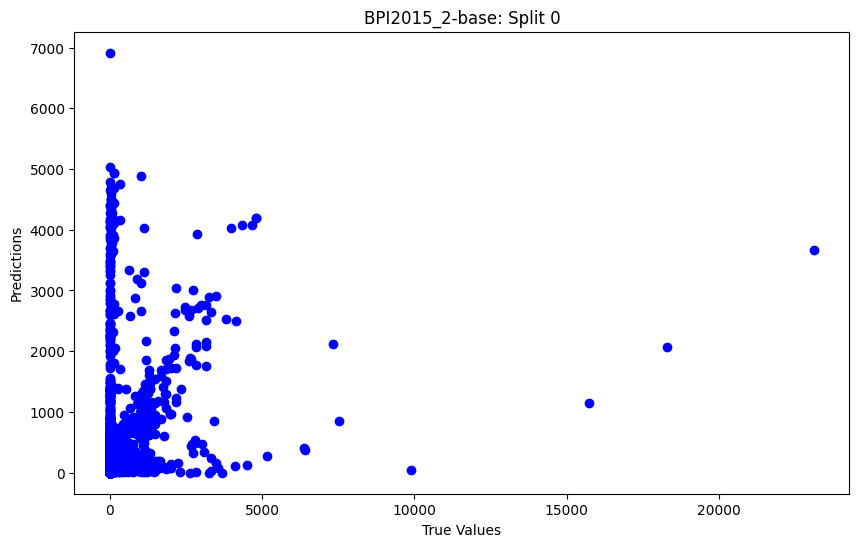

Split 1: 14786 train rows, 7392 test rows
{'mse': 539956.6325040682,
 'rmse': 734.8174143990249,
 'split': 1,
 'time': 0.7870793342590332}


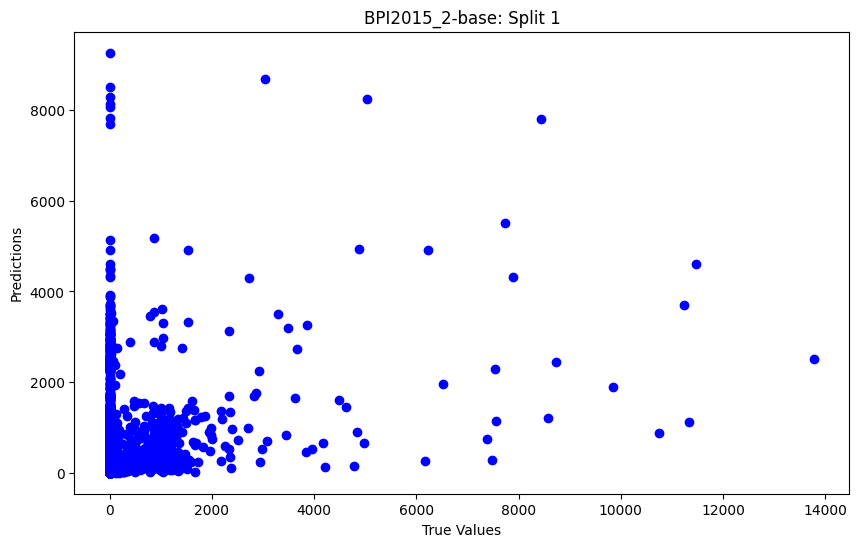

Split 2: 22178 train rows, 7392 test rows
{'mse': 455843.7349300335,
 'rmse': 675.162006432555,
 'split': 2,
 'time': 1.2450883388519287}


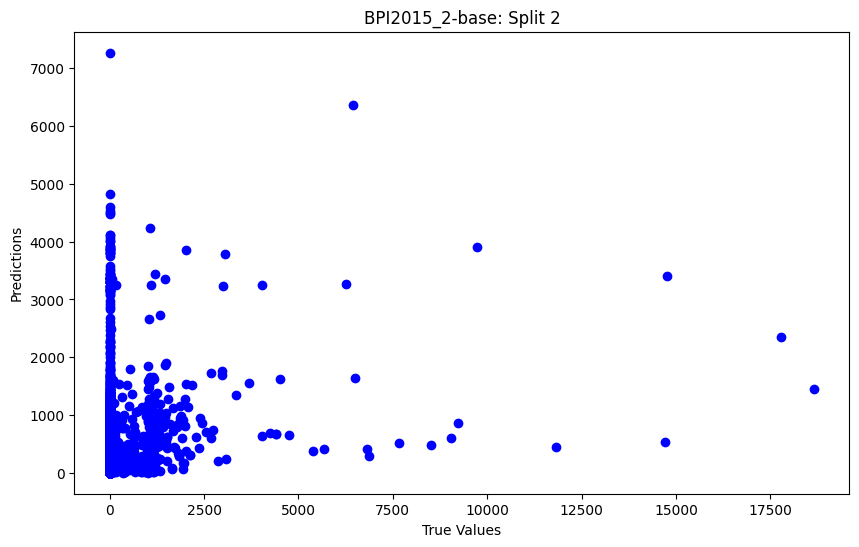

Split 3: 29570 train rows, 7392 test rows
{'mse': 177391.14388889752,
 'rmse': 421.17828040973046,
 'split': 3,
 'time': 1.6257920265197754}


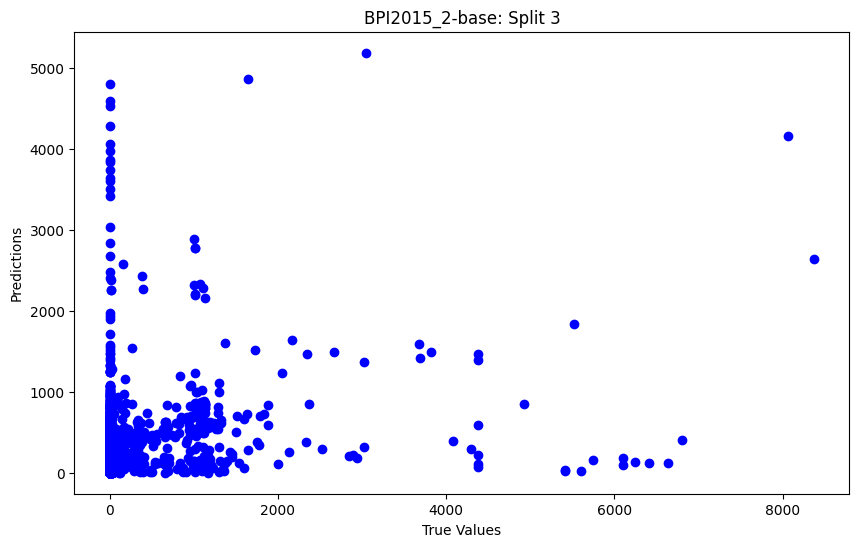

Split 4: 36962 train rows, 7392 test rows
{'mse': 89633.56641901298,
 'rmse': 299.38865445940496,
 'split': 4,
 'time': 1.9466688632965088}


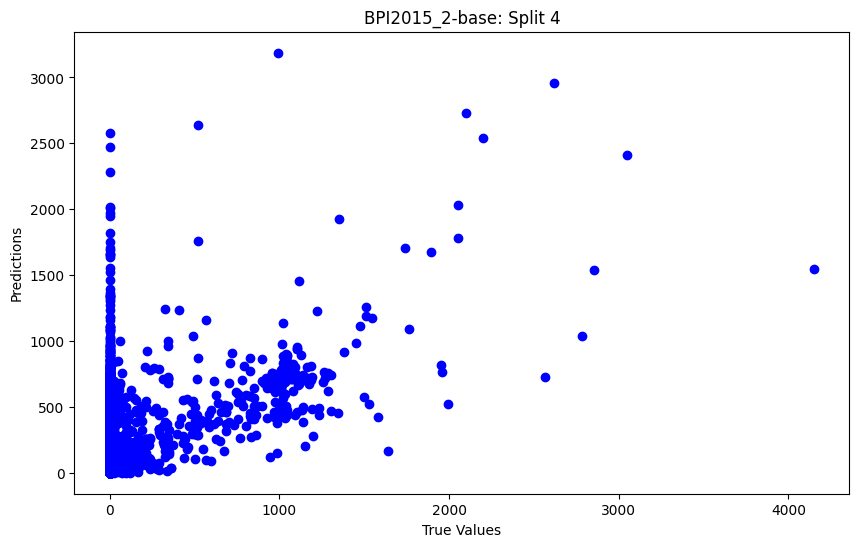

{'mse': 340070.5646541317, 'rmse': 558.4010313565143}


In [19]:
results_base = causality.run_experiment(
    dataset,
    target="elapsed_time_from_event_timestamp",
    name="BPI2015_2",
    experiment="base",
)

### causal inference and causal informed prediction

/home/ppibot/Escritorio/causally-informed-prescriptive-monitoring-main/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ppibot/Escritorio/causally-informed-prescriptive-monitoring-main/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
Depth=0, working on node 21: 100%|██████████| 22/22 [00:00<00:00, 448.24it/s]


X3 --> X21
X5 --> X6
X17 --> X8
X17 --> X21
X19 --> X21


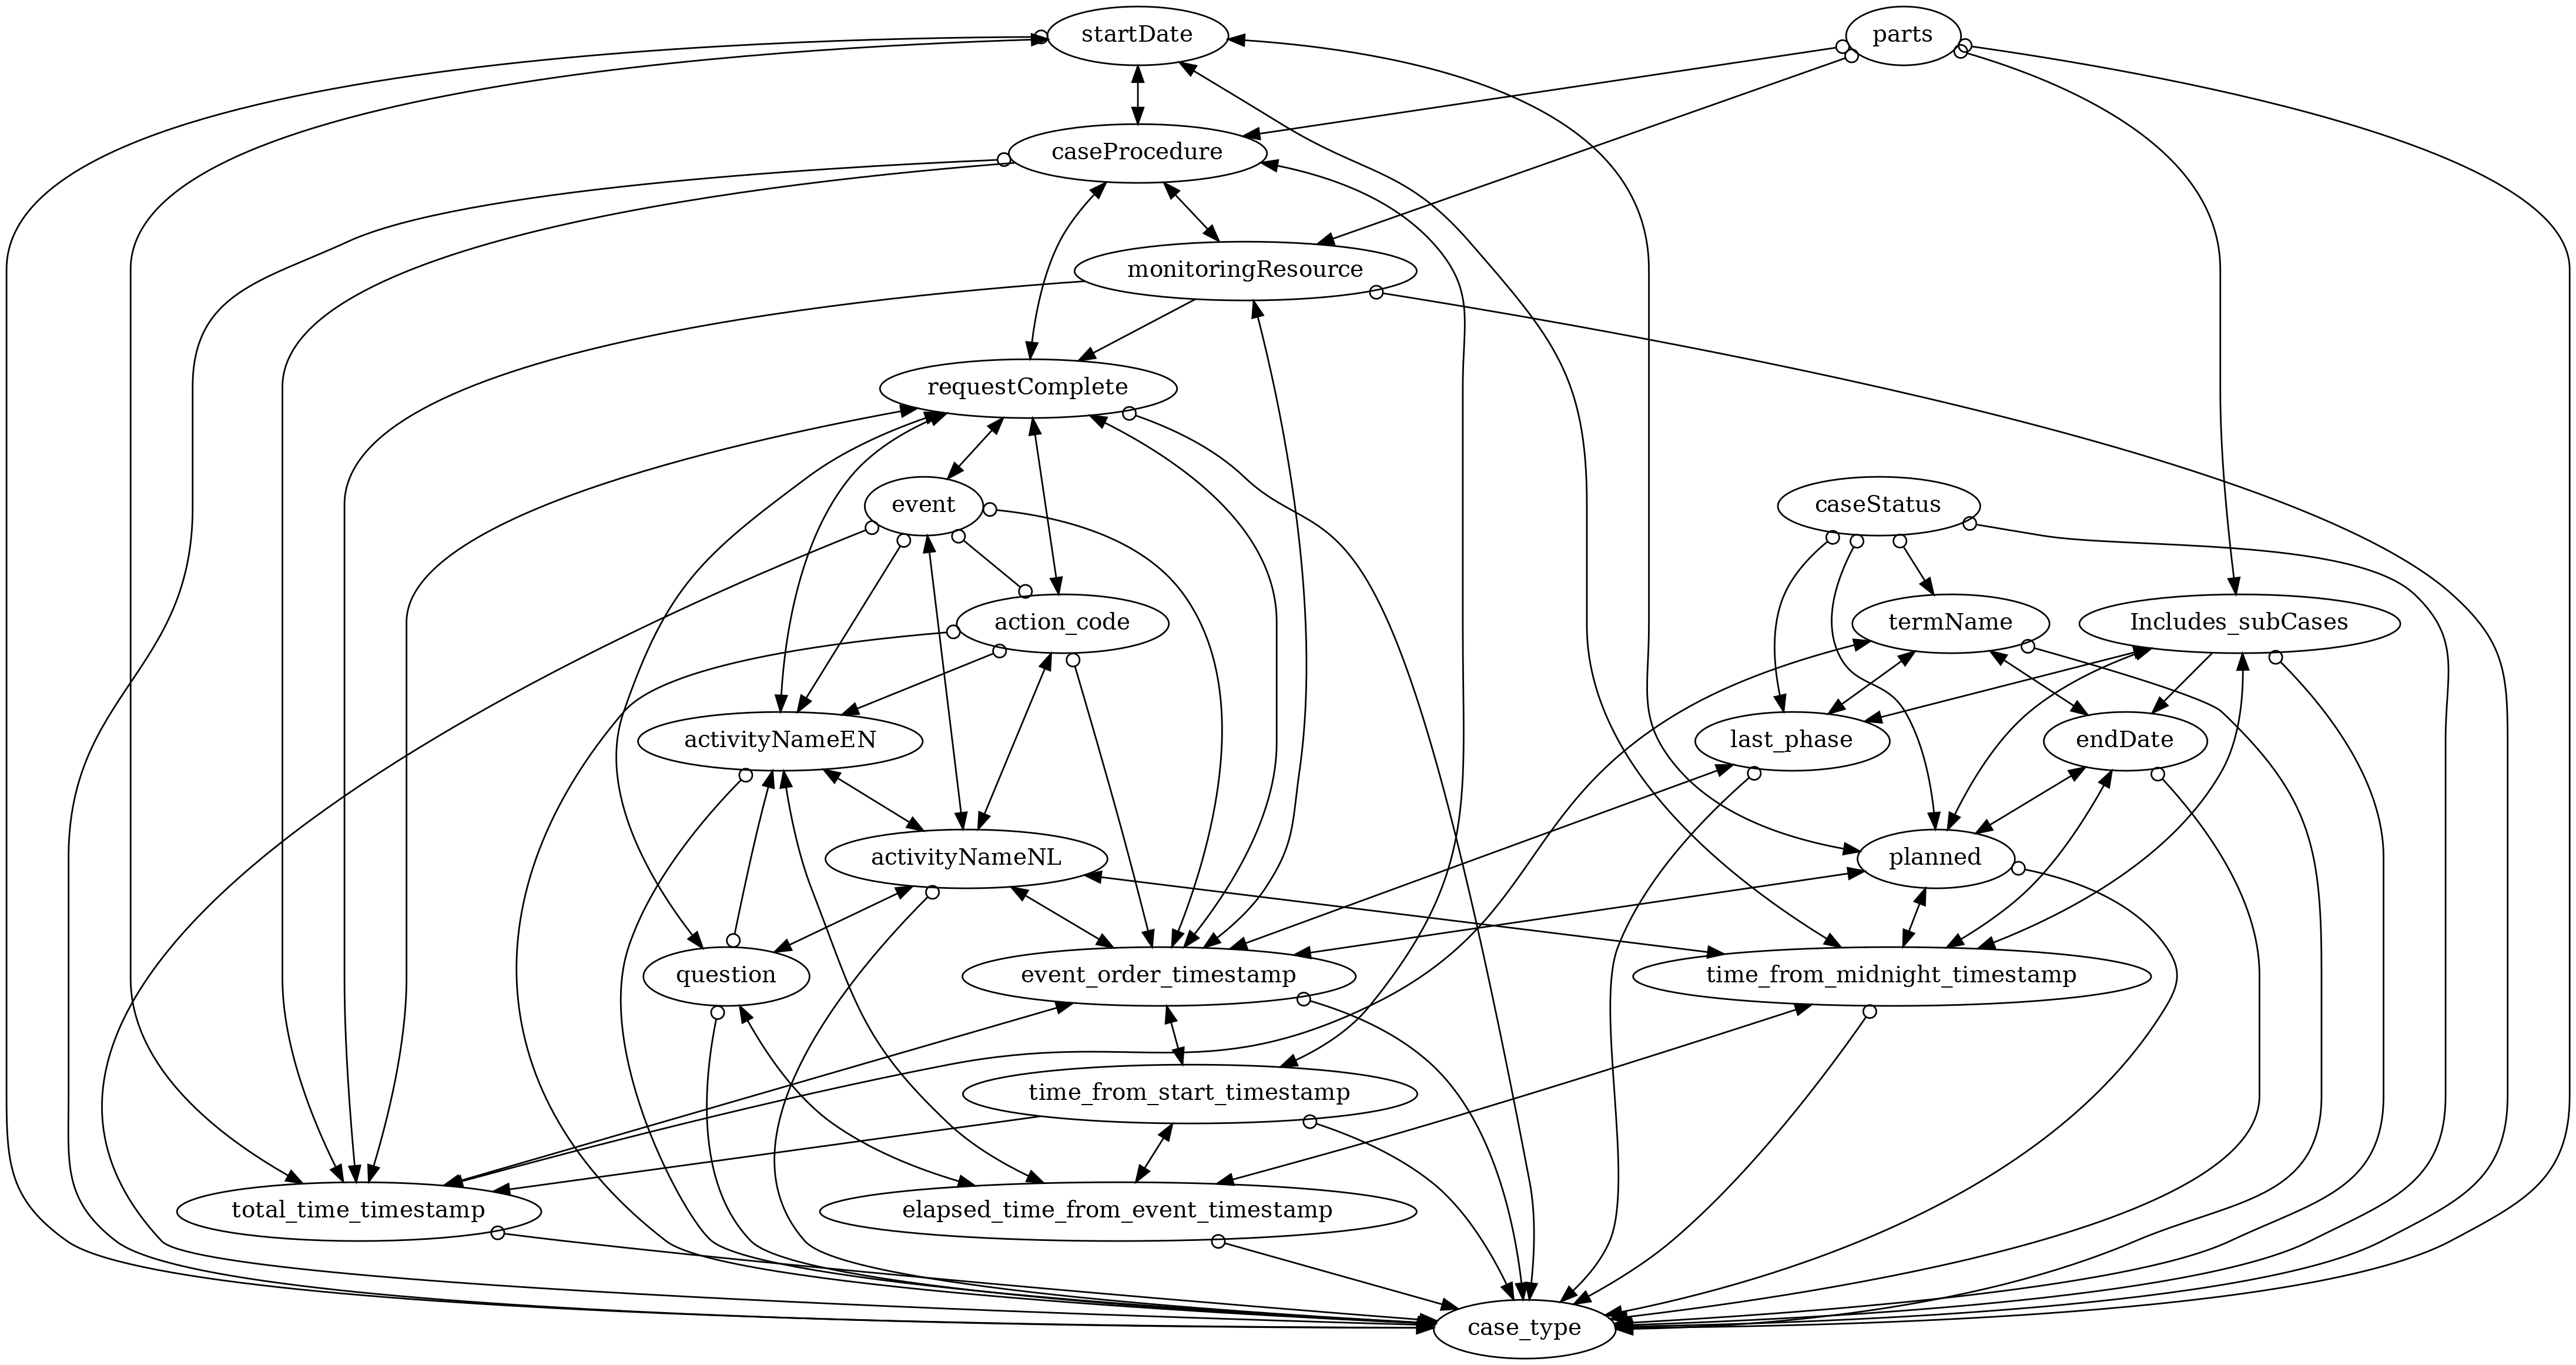

In [20]:
graph = causality.causal_inference_fci(dataset, "BPI2015_2")

In [21]:
parents = [
    "activityNameEN",
    "question",
    "time_from_start_timestamp",
    "time_from_midnight_timestamp",
]
parents_of_parents = {
    "activityNameEN": [
        "requestComplete",
    ],
    "question": [
        "activityNameNL",
    ],
    "time_from_start_timestamp": [
        "event_order_timestamp",
    ],
    "time_from_midnight_timestamp": [
        "planned",
        "endDate",
        "Includes_subCases",
    ],
}
parents_2_order = list(parents_of_parents.keys()) + [
    item for sublist in parents_of_parents.values() for item in sublist
]

### run only 1 order parents experiment

/home/ppibot/Escritorio/causally-informed-prescriptive-monitoring-main/experiments/causality.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=[target], inplace=True)


Split 0: 7394 train rows, 7392 test rows
{'mse': 579285.7943316232,
 'rmse': 761.1082671549582,
 'split': 0,
 'time': 0.1311814785003662}


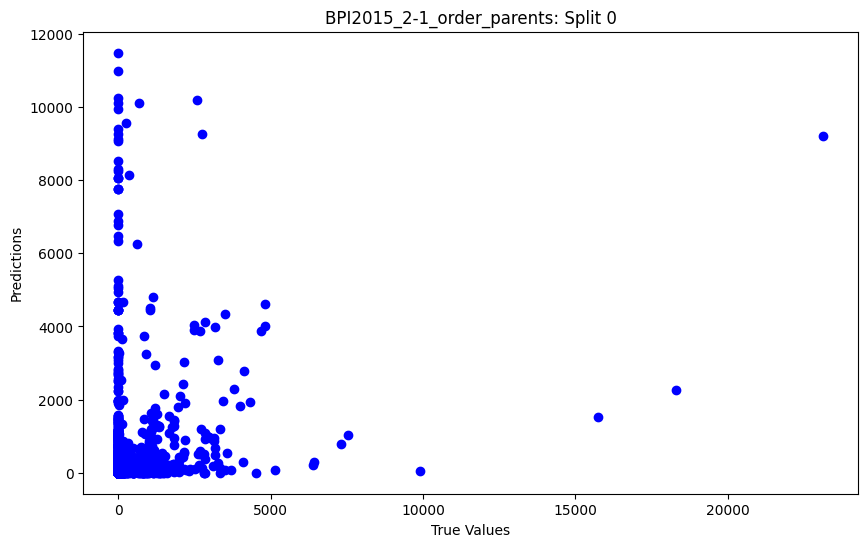

Split 1: 14786 train rows, 7392 test rows
{'mse': 780692.5663124091,
 'rmse': 883.568088102105,
 'split': 1,
 'time': 0.24024367332458496}


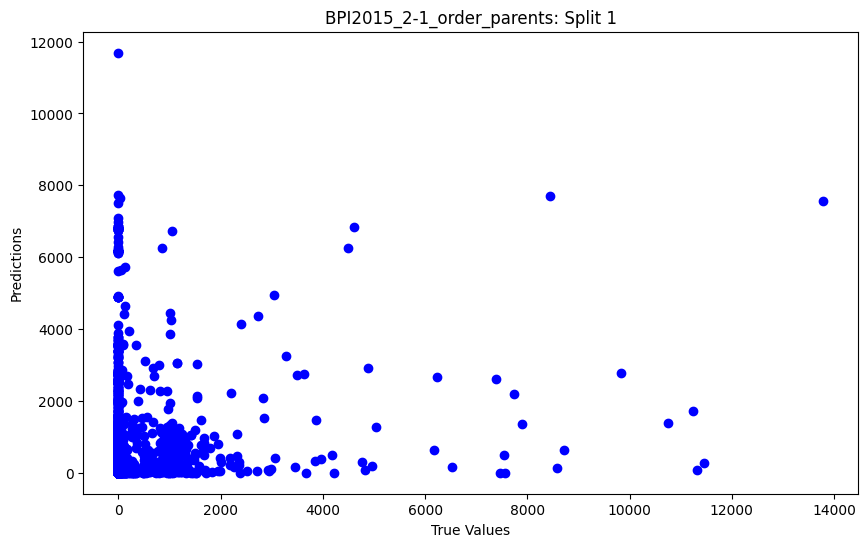

Split 2: 22178 train rows, 7392 test rows
{'mse': 402596.8855121452,
 'rmse': 634.5052289084348,
 'split': 2,
 'time': 0.33988308906555176}


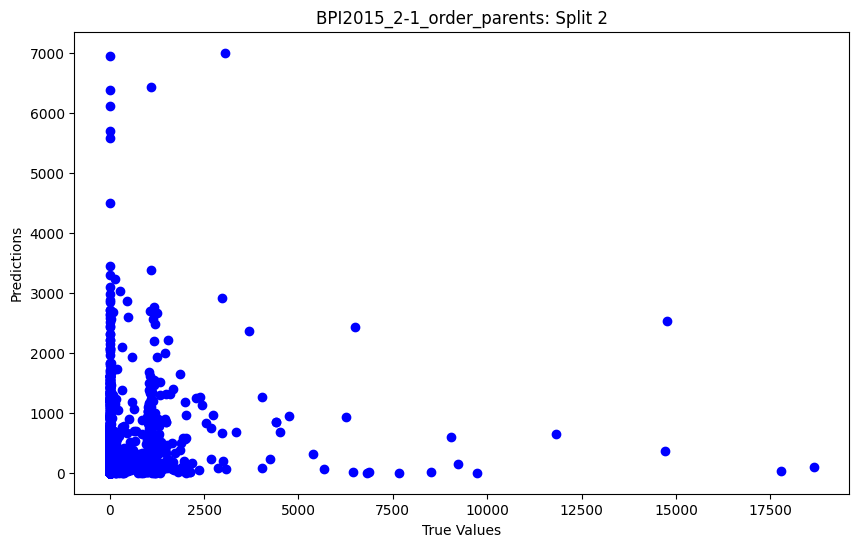

Split 3: 29570 train rows, 7392 test rows
{'mse': 153565.62599903625,
 'rmse': 391.8745028692684,
 'split': 3,
 'time': 0.43588924407958984}


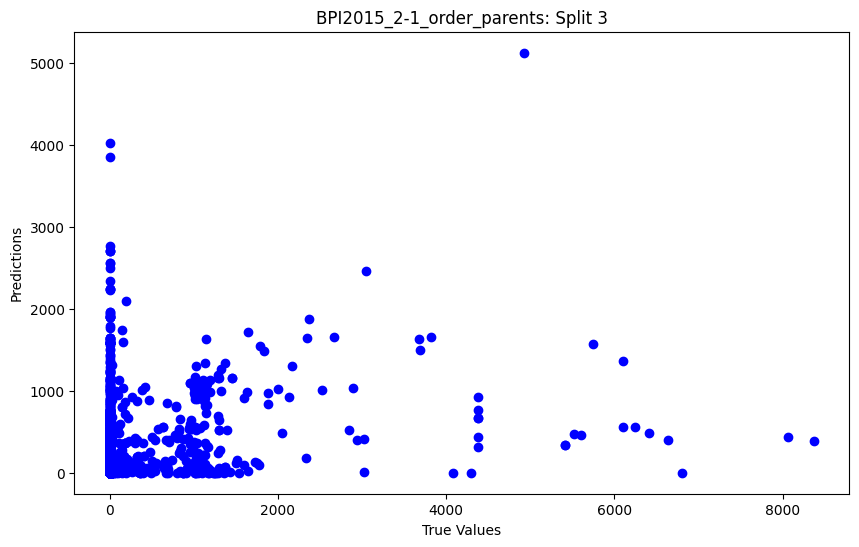

Split 4: 36962 train rows, 7392 test rows
{'mse': 46082.4134996189,
 'rmse': 214.66814738013395,
 'split': 4,
 'time': 0.4706718921661377}


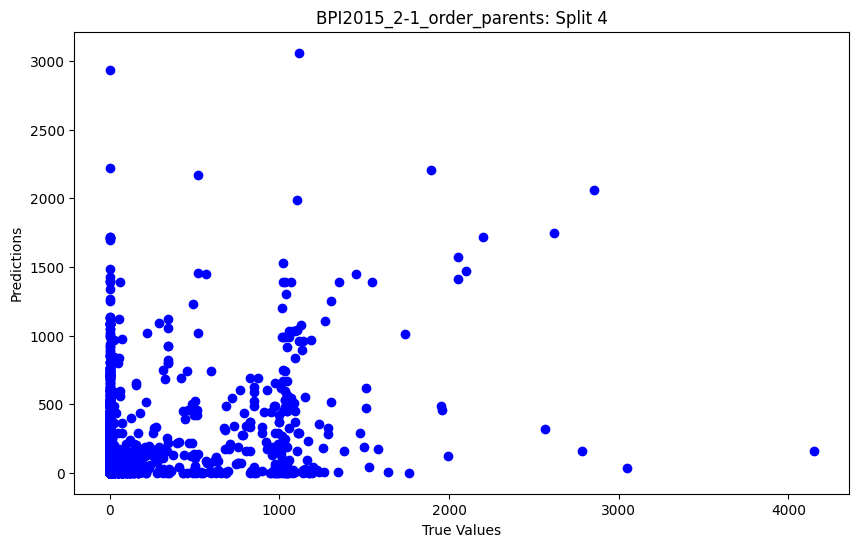

{'mse': 392444.65713096655, 'rmse': 577.1448468829801}


In [22]:
columns = parents + ["elapsed_time_from_event_timestamp"]

results_1_order_parents = causality.run_experiment(
    dataset,
    target="elapsed_time_from_event_timestamp",
    name="BPI2015_2",
    experiment="1_order_parents",
    columns=columns,
)

### run without parents experiments

Split 0: 7394 train rows, 7392 test rows


/home/ppibot/Escritorio/causally-informed-prescriptive-monitoring-main/experiments/causality.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=[target], inplace=True)


{'mse': 691174.2514644655,
 'rmse': 831.3689021514249,
 'split': 0,
 'time': 0.2262887954711914}


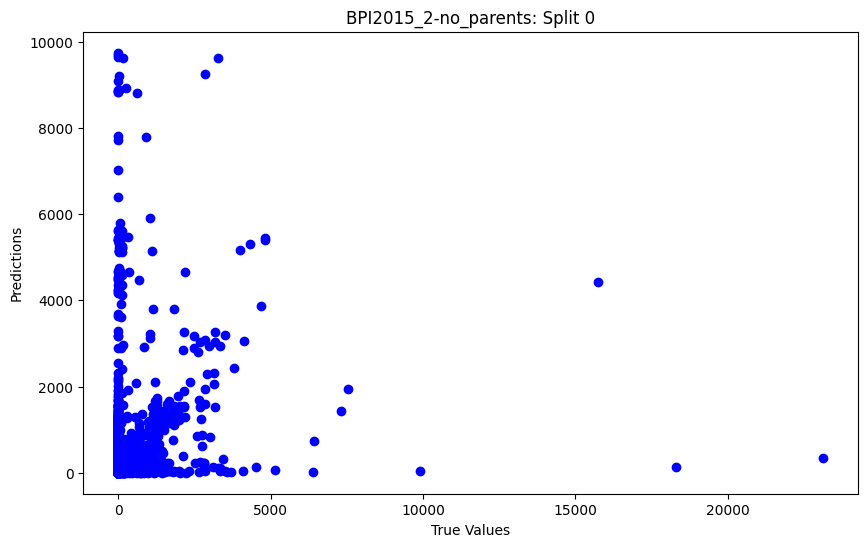

Split 1: 14786 train rows, 7392 test rows
{'mse': 356561.56253377046,
 'rmse': 597.1277606457185,
 'split': 1,
 'time': 0.4862985610961914}


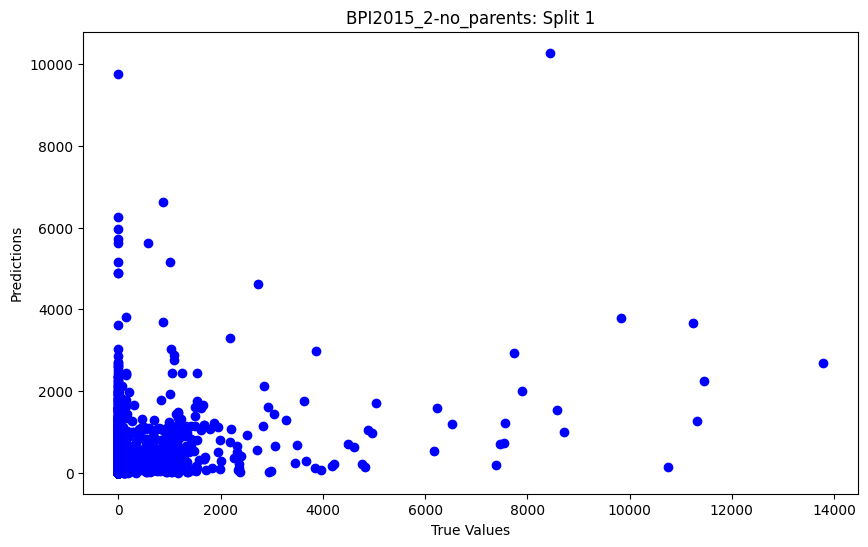

Split 2: 22178 train rows, 7392 test rows
{'mse': 491510.4455957641,
 'rmse': 701.0780595595359,
 'split': 2,
 'time': 0.7147431373596191}


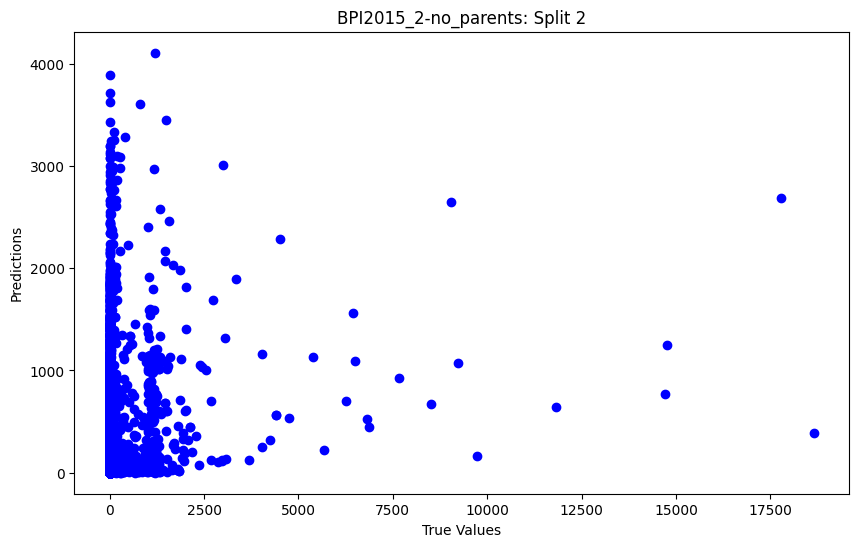

Split 3: 29570 train rows, 7392 test rows
{'mse': 270408.60336163075,
 'rmse': 520.008272397306,
 'split': 3,
 'time': 1.1088051795959473}


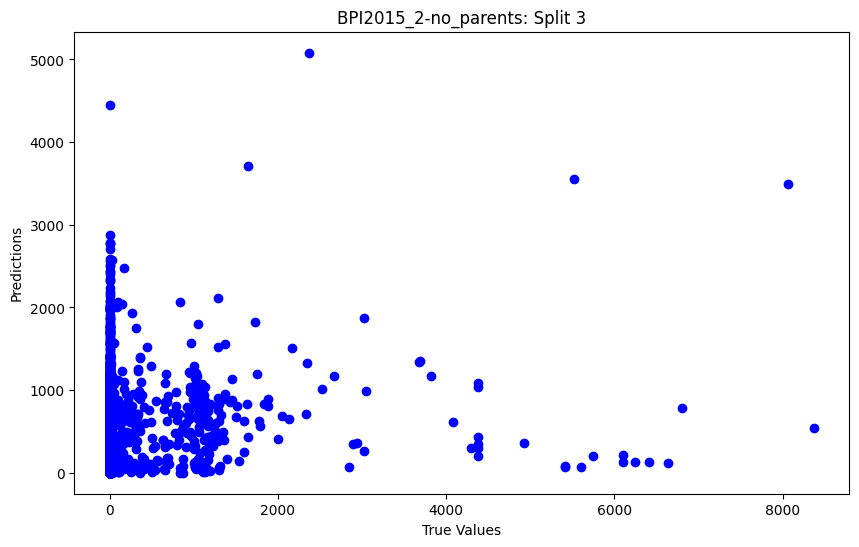

Split 4: 36962 train rows, 7392 test rows
{'mse': 106060.25808383992,
 'rmse': 325.6689393906639,
 'split': 4,
 'time': 1.215097427368164}


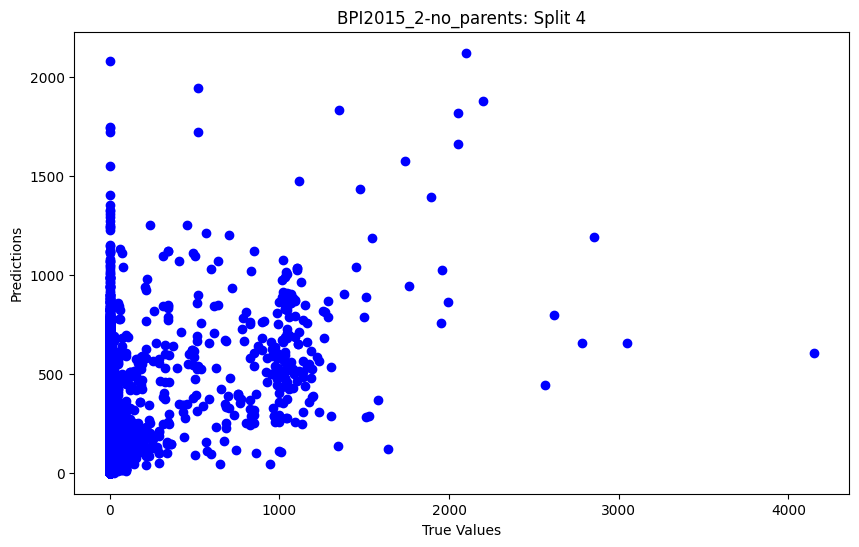

{'mse': 383143.0242078941, 'rmse': 595.05038682893}


In [23]:
columns = filter(lambda i: i not in parents, dataset.columns.tolist())

results_no_parents = causality.run_experiment(
    dataset,
    target="elapsed_time_from_event_timestamp",
    name="BPI2015_2",
    experiment="no_parents",
    columns=columns,
)

### run second order parents experiments

Split 0: 7394 train rows, 7392 test rows


/home/ppibot/Escritorio/causally-informed-prescriptive-monitoring-main/experiments/causality.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=[target], inplace=True)


{'mse': 488703.2832493603,
 'rmse': 699.0731601551873,
 'split': 0,
 'time': 0.23341059684753418}


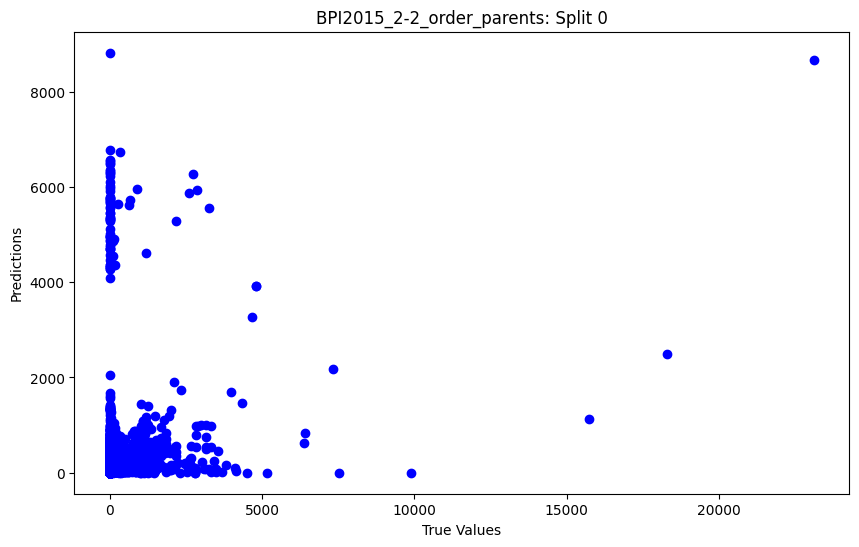

Split 1: 14786 train rows, 7392 test rows
{'mse': 326392.6368669782,
 'rmse': 571.3078302167564,
 'split': 1,
 'time': 0.47249603271484375}


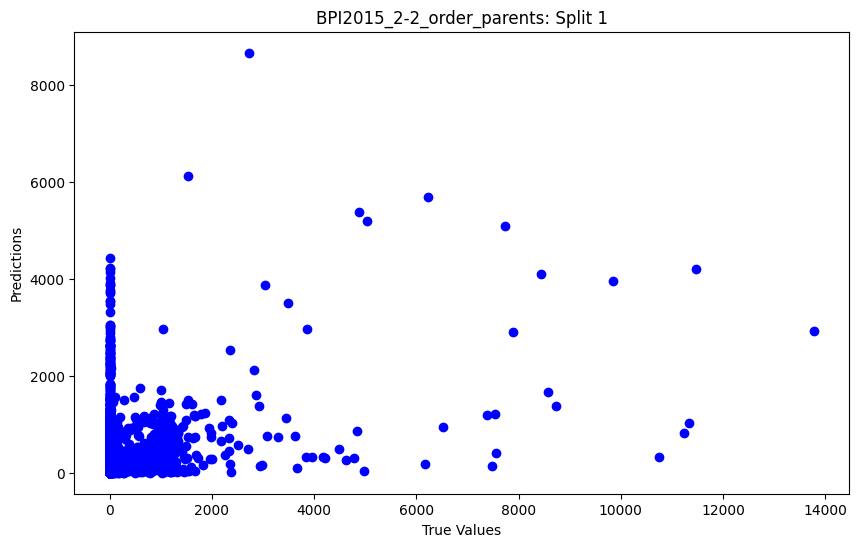

Split 2: 22178 train rows, 7392 test rows
{'mse': 323744.57165958046,
 'rmse': 568.9855636653539,
 'split': 2,
 'time': 0.7747280597686768}


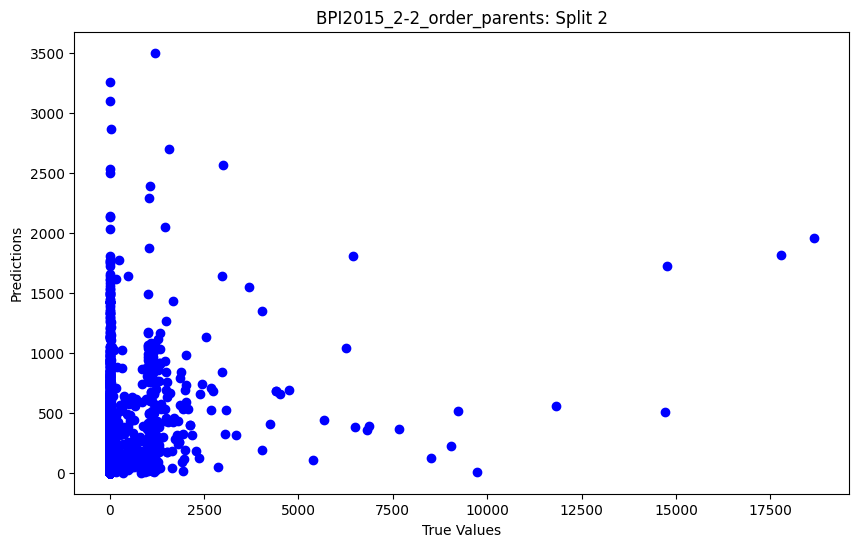

Split 3: 29570 train rows, 7392 test rows
{'mse': 158104.0140294344,
 'rmse': 397.6229546057853,
 'split': 3,
 'time': 1.0601437091827393}


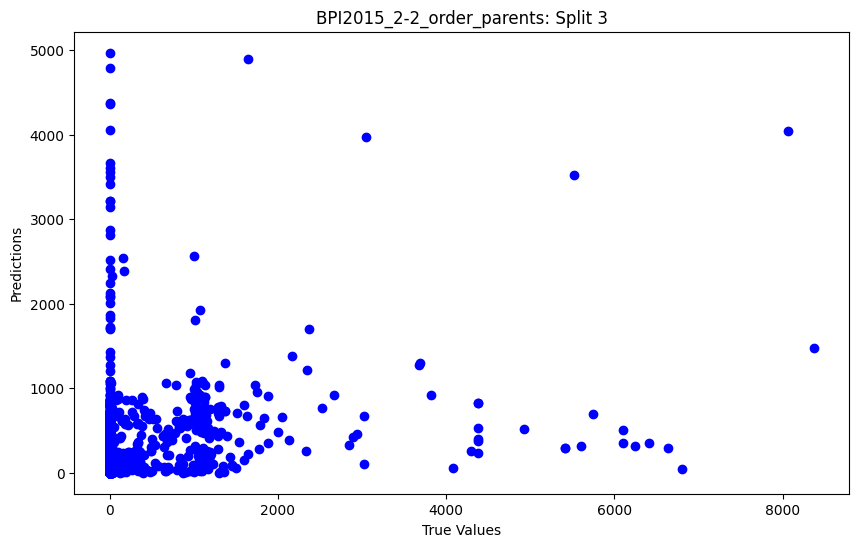

Split 4: 36962 train rows, 7392 test rows
{'mse': 142118.3675103515,
 'rmse': 376.9858982911052,
 'split': 4,
 'time': 1.2669050693511963}


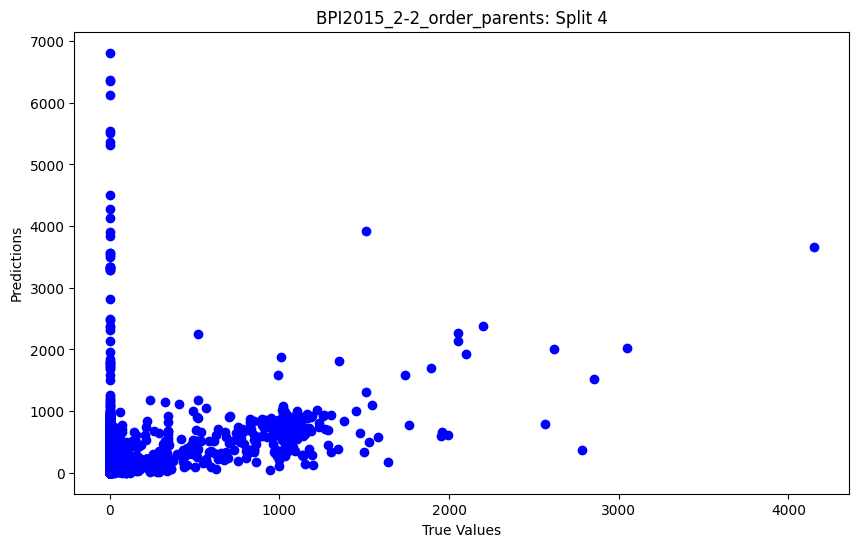

{'mse': 287812.5746631409, 'rmse': 522.7950813868376}


In [24]:
columns = parents_2_order + ["elapsed_time_from_event_timestamp"]

results_2_order_parents = causality.run_experiment(
    dataset,
    target="elapsed_time_from_event_timestamp",
    name="BPI2015_2",
    experiment="2_order_parents",
    columns=columns,
)